<a href="https://colab.research.google.com/github/katiejoy97/katiejoy97/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Check for GPU
!nvidia-smi


Tue Oct 15 14:34:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [13]:
### Make a binary classification dataset with Scikit-learn's make_moons() function
## for consistency, the dataset should have 1000 samples and a random_state=42
##Turn the data into pytorch tensors
##split the data into training and test setss using train_test_split with 80$ training and 20% testing

from sklearn.datasets import make_moons

NUM_SAMPLES = 1080
RANDOM_SEED = 42

X, y = make_moons(n_samples=NUM_SAMPLES,
                  noise=0.07,
                  random_state=RANDOM_SEED)

X[:10], y[:10]

(array([[-0.71254162,  0.69391465],
        [ 0.09810014,  0.52399064],
        [ 0.44400065, -0.37747361],
        [-0.03520574,  0.18796065],
        [ 1.99865407,  0.39601344],
        [ 0.0341585 , -0.09135543],
        [ 1.88395586,  0.19433246],
        [ 1.86278049,  0.0227567 ],
        [ 2.12366454,  0.49470766],
        [ 1.62951402, -0.25809812]]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [14]:
#turn dataset into a dataframe
import pandas as pd
data_df = pd.DataFrame({"X0": X[:,0],
                        "X1": X[:,1],
                        "y":y})
data_df.head()

,X0,X1,y
0,-0.712542,0.693915,0
1,0.098100,0.523991,1
2,0.444001,-0.377474,1
3,-0.035206,0.187961,1
4,1.998654,0.396013,1


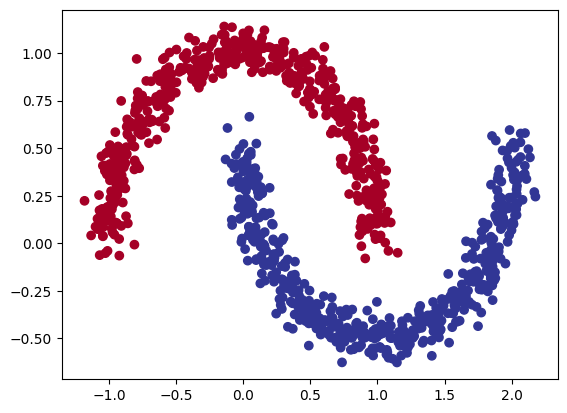

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [18]:
#Turn data into tensors
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

#Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

len(X_train), len(X_test), len(y_train), len(y_test)

(864, 216, 864, 216)

In [21]:

import torch
from torch import nn

class MoonModelV0(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
        super().__init__()

        self.layer1 = nn.Linear(in_features=in_features,
                                 out_features=hidden_units)
        self.layer2 = nn.Linear(in_features=hidden_units,
                                 out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units,
                                out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_0 = MoonModelV0(in_features=2,
                      out_features=1,
                      hidden_units=10).to(device)
model_0


MoonModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [22]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.6201, -0.6489],
                      [ 0.2885, -0.0379],
                      [-0.3014,  0.0917],
                      [-0.5003,  0.0757],
                      [ 0.2198, -0.0807],
                      [ 0.0480, -0.1627],
                      [ 0.6764, -0.1787],
                      [ 0.0777,  0.4119],
                      [-0.4673,  0.3231],
                      [-0.2215, -0.6191]], device='cuda:0')),
             ('layer1.bias',
              tensor([-0.1228, -0.2304, -0.4628,  0.5417, -0.5534,  0.1116, -0.2661, -0.0305,
                      -0.2849,  0.1629], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 0.1995,  0.1485,  0.2284, -0.0339,  0.1279, -0.2084, -0.2047, -0.3001,
                        0.1968, -0.0292],
                      [ 0.1969,  0.1292,  0.3064, -0.2425,  0.1536,  0.0514, -0.3058, -0.2411,
                       -0.2952,  0.0711],
                      [ 0.0651,  0.2712, 

In [32]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [33]:
#What's coming out of the model

#logits raw outputs of model

print("Logits:")
print(model_0(X_train.to(device)[:10]).squeeze())

#prediction probabilities

print("Pred probs:")
print(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze()))

#prediciton probabilities

print("Pred labels:")
print(torch.round(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze())))



Logits:
tensor([  6.0830, -10.0235,   7.6935,  -6.0818,  -8.6113,   6.3785,   6.5887,
          8.8438,  -8.7569,   7.7227], device='cuda:0',
       grad_fn=<SqueezeBackward0>)
Pred probs:
tensor([9.9772e-01, 4.4344e-05, 9.9954e-01, 2.2788e-03, 1.8201e-04, 9.9831e-01,
        9.9863e-01, 9.9986e-01, 1.5734e-04, 9.9956e-01], device='cuda:0',
       grad_fn=<SigmoidBackward0>)
Pred labels:
tensor([1., 0., 1., 0., 0., 1., 1., 1., 0., 1.], device='cuda:0',
       grad_fn=<RoundBackward0>)


In [34]:
#Lets calculate the accuracy

!pip -q install torchmetrics #colab doesnt have torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device)
acc_fn

MulticlassAccuracy()

In [35]:
torch.manual_seed(RANDOM_SEED)

epochs=1000

#send data to thedevice

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Loop through the data
for epoch in range(epochs):
  ###training
  model_0.train()

  #1. Forward pass
  y_logits = model_0(X_train).squeeze()

  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)

  #2 Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_pred,y_train.int())

  #3 zero the gradients
  optimizer.zero_grad()

  #4
  loss.backward()

  #5.
  optimizer.step()

  ###Testing
  model_0.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2 Caculate the loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test.int())

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:2f} Acc: {acc: .2f} | Test loss: {test_loss: .2f} Test acc: {test_acc: .2f}")

Epoch: 0 | Loss: 0.005027 Acc:  1.00 | Test loss:  0.01 Test acc:  1.00
Epoch: 100 | Loss: 0.004612 Acc:  1.00 | Test loss:  0.01 Test acc:  1.00
Epoch: 200 | Loss: 0.004255 Acc:  1.00 | Test loss:  0.01 Test acc:  1.00
Epoch: 300 | Loss: 0.003945 Acc:  1.00 | Test loss:  0.01 Test acc:  1.00
Epoch: 400 | Loss: 0.003674 Acc:  1.00 | Test loss:  0.01 Test acc:  1.00
Epoch: 500 | Loss: 0.003435 Acc:  1.00 | Test loss:  0.01 Test acc:  1.00
Epoch: 600 | Loss: 0.003222 Acc:  1.00 | Test loss:  0.01 Test acc:  1.00
Epoch: 700 | Loss: 0.003031 Acc:  1.00 | Test loss:  0.01 Test acc:  1.00
Epoch: 800 | Loss: 0.002859 Acc:  1.00 | Test loss:  0.01 Test acc:  1.00
Epoch: 900 | Loss: 0.002704 Acc:  1.00 | Test loss:  0.01 Test acc:  1.00


In [40]:
# Plot the model predictions

import numpy as np

# TK - this could go in the helper_functions.py and be explained there
def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

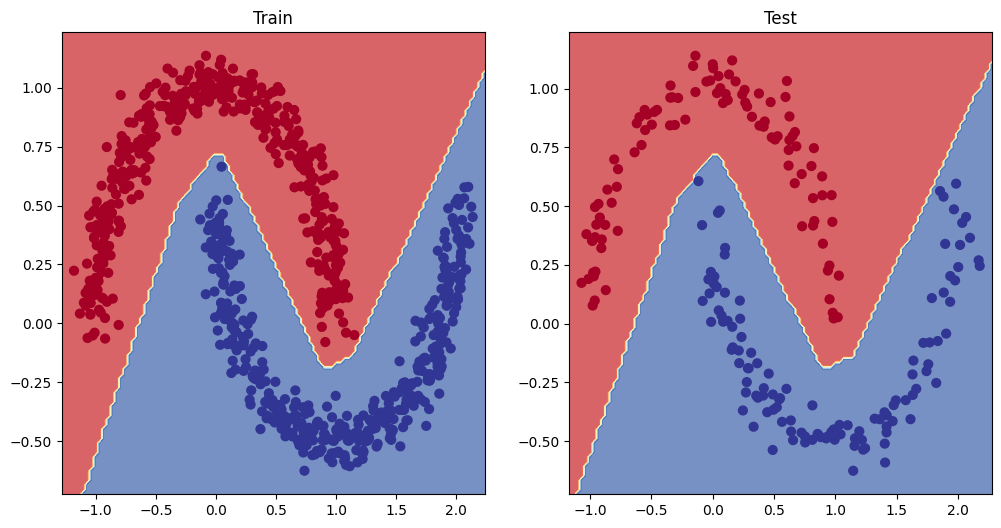

In [50]:

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

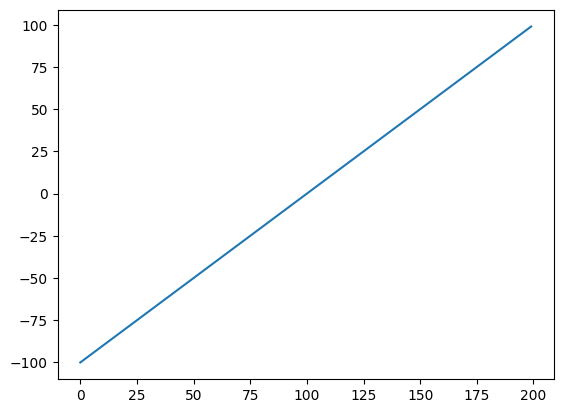

In [51]:
###replicate the tanh
tensor_A = torch.arange(-100, 100,1)
plt.plot(tensor_A)

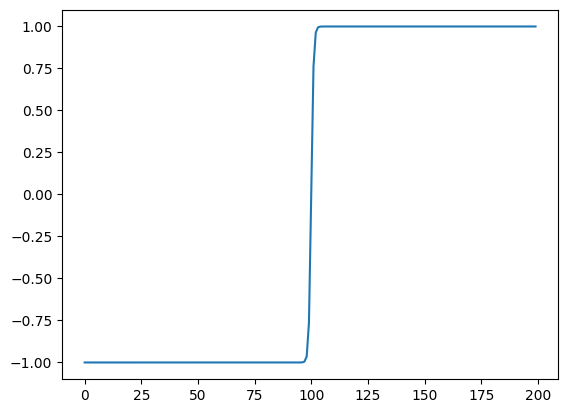

In [52]:
plt.plot(torch.tanh(tensor_A))

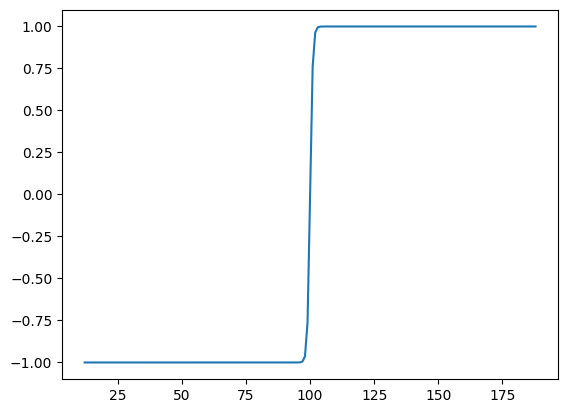

In [56]:

def tanh(x):
  # Source - https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plt.plot(tanh(tensor_A))

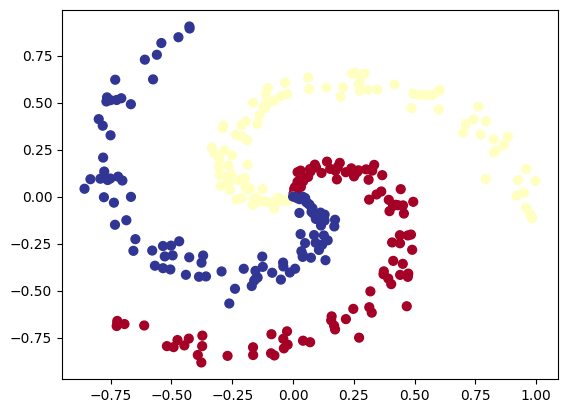

In [58]:
###Create a multiclass dataset using the spiral data creation function from CS231n
##split the data into training and test set 80-20 split as well as turn data into pytorch tensors

#code for creating a spiral dataset

import numpy as np

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

N = 100
D = 2
K = 3
X = np.zeros((N*K, D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j, N*(j+1))
  r = np.linspace(0.0,1,N)
  t = np.linspace(j*4, (j+1)*4,N)+np.random.randn(N)*0.2
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [60]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=RANDOM_SEED)
len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [61]:
# Let's calculate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=3).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [62]:
#Prepare device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"

class SpiralModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(in_features=2, out_features=10)
    self.linear2 = nn.Linear(in_features=10, out_features=10)
    self.linear3 = nn.Linear(in_features=10, out_features=3)
    self.relu = nn.ReLU()

  def forward(self,x):
    return self.linear3(self.relu(self.linear2(self.relu(self.linear1(x)))))

model_1 = SpiralModel().to(device)
model_1

SpiralModel(
  (linear1): Linear(in_features=2, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [63]:
#Setup data to be device agnositc
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)

#print out untrained model outputs
print("Logits:")
print(model_1(X_train)[:10])

print("Pred probs:")
print(torch.softmax(model_1(X_train)[:10],dim=1))

print("Pred labels:")
print(torch.softmax(model_1(X_train)[:10], dim=1).argmax(dim=1))

torch.float32 torch.float32 torch.int64 torch.int64
Logits:
tensor([[-0.2160, -0.0600,  0.2256],
        [-0.2020, -0.0530,  0.2257],
        [-0.2223, -0.0604,  0.2384],
        [-0.2174, -0.0555,  0.2826],
        [-0.2201, -0.0502,  0.2792],
        [-0.2195, -0.0565,  0.2457],
        [-0.2212, -0.0581,  0.2440],
        [-0.2251, -0.0631,  0.2354],
        [-0.2116, -0.0548,  0.2336],
        [-0.2170, -0.0552,  0.2842]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.2685, 0.3139, 0.4176],
        [0.2707, 0.3142, 0.4151],
        [0.2659, 0.3126, 0.4215],
        [0.2615, 0.3074, 0.4311],
        [0.2609, 0.3092, 0.4299],
        [0.2653, 0.3123, 0.4224],
        [0.2653, 0.3123, 0.4224],
        [0.2659, 0.3127, 0.4214],
        [0.2681, 0.3136, 0.4184],
        [0.2614, 0.3072, 0.4314]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')


In [64]:
#Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr=0.02)

In [66]:
#Build a training loop for the model

epochs=1000

#loop over data
for epoch in range (epochs):
  ##Training
  model_1.train()
  #1. forward pass
  y_logits = model_1(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  #2. calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc= acc_fn(y_pred, y_train)

  #3 optimizer zero grad
  optimizer.zero_grad()

  #4 loss backwards
  loss.backward()

  #5 optimizer step step step
  optimizer.step()

  ##testing
  model_1.eval()
  with torch.inference_mode():
    #1 forward pass
    test_logits = model_1(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    #2 calculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test)

  #Print out whats happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")


Epoch: 0 | Loss: 1.12 Acc: 0.32 | Test loss: 1.10 Test acc: 0.37
Epoch: 100 | Loss: 0.45 Acc: 0.78 | Test loss: 0.53 Test acc: 0.68
Epoch: 200 | Loss: 0.12 Acc: 0.96 | Test loss: 0.09 Test acc: 0.98
Epoch: 300 | Loss: 0.07 Acc: 0.98 | Test loss: 0.02 Test acc: 1.00
Epoch: 400 | Loss: 0.05 Acc: 0.98 | Test loss: 0.01 Test acc: 1.00
Epoch: 500 | Loss: 0.04 Acc: 0.99 | Test loss: 0.01 Test acc: 1.00
Epoch: 600 | Loss: 0.03 Acc: 0.99 | Test loss: 0.01 Test acc: 1.00
Epoch: 700 | Loss: 0.03 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 800 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 900 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00


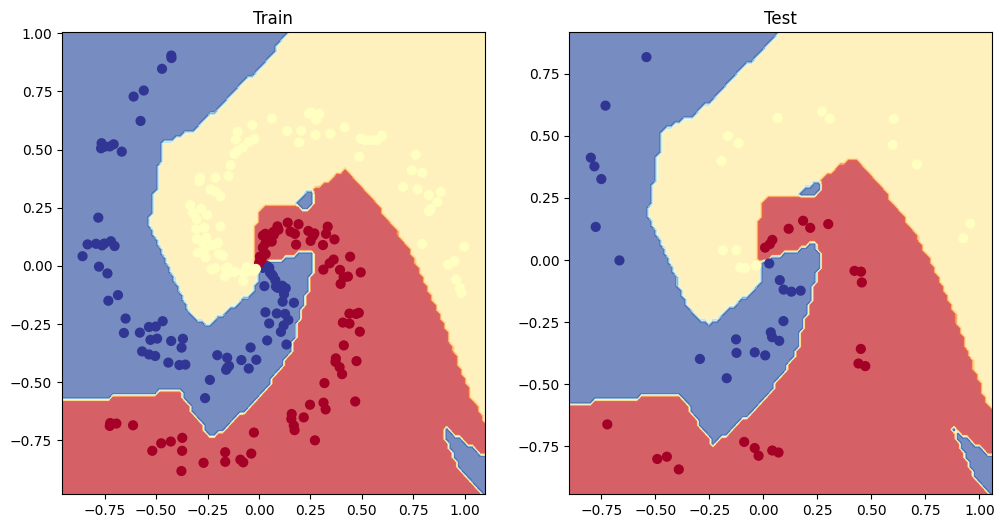

In [69]:
#plot decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)